In [1]:
from src.ACO.aco_structures import Edge, Ant, Problem
from src.ACO.solve import SolveTSPUsingACO
from src.ACO.load_data_aco import load_data

In [2]:
import numpy as np

In [3]:
data = load_data('dataset/hustack/input/100.txt')

In [4]:
problem = Problem(num_request=data[0],
                  request=data[1], 
                  time_matrix=np.array(data[2]))

Starting ACO algorithm (ACS)...


Running ACO (ACS):   0%|          | 0/100 [00:00<?, ?it/s]

Running ACO (ACS): 100%|██████████| 100/100 [00:46<00:00,  2.14it/s]


Completed ACS
Runtime: 46.7647s
Best Fitness (Cost): 211133470.00
Travel=55620, Late=211035.0, Wait=4285.0
Best tour: [1, 18, 92, 88, 48, 69, 24, 73, 9, 33, 39, 61, 60, 32, 19, 95, 28, 79, 81, 89, 25, 38, 7, 47, 26, 15, 99, 76, 5, 41, 37, 6, 72, 36, 31, 30, 3, 64, 86, 42, 67, 35, 46, 57, 75, 49, 2, 16, 97, 85, 29, 56, 98, 100, 62, 87, 52, 51, 11, 71, 65, 21, 44, 74, 70, 53, 20, 4, 54, 82, 50, 84, 17, 78, 12, 8, 83, 27, 40, 22, 90, 58, 63, 93, 94, 68, 43, 34, 66, 91, 77, 80, 14, 13, 45, 10, 23, 55, 96, 59]
Starting ACO algorithm (Elitist)...


Running ACO (Elitist): 100%|██████████| 100/100 [00:53<00:00,  1.87it/s]


Completed Elitist
Runtime: 53.4005s
Best Fitness (Cost): 184130270.00
Travel=59570, Late=184042.0, Wait=2870.0
Best tour: [1, 18, 92, 88, 48, 69, 24, 73, 9, 33, 61, 60, 32, 19, 95, 23, 28, 81, 89, 25, 38, 7, 47, 26, 15, 99, 55, 76, 41, 37, 6, 72, 36, 31, 30, 3, 64, 86, 42, 80, 67, 35, 46, 57, 75, 49, 2, 16, 14, 97, 85, 29, 56, 98, 100, 62, 87, 52, 51, 11, 71, 65, 21, 44, 74, 70, 53, 20, 4, 54, 50, 84, 17, 78, 12, 8, 10, 96, 83, 27, 13, 45, 40, 22, 90, 58, 63, 93, 94, 66, 91, 77, 79, 68, 59, 39, 43, 5, 34, 82]
Starting ACO algorithm (MaxMin)...


Running ACO (MaxMin): 100%|██████████| 100/100 [01:18<00:00,  1.28it/s]


Completed MaxMin
Runtime: 78.1805s
Best Fitness (Cost): 59160.00
Travel=0, Late=0, Wait=0
Best tour: [1, 18, 92, 88, 48, 69, 24, 73, 9, 33, 39, 61, 60, 32, 19, 95, 23, 28, 79, 81, 89, 25, 38, 7, 47, 26, 15, 99, 55, 76, 5, 41, 37, 6, 72, 36, 31, 30, 3, 64, 86, 42, 80, 67, 35, 46, 57, 75, 49, 2, 16, 14, 97, 85, 29, 56, 98, 100, 62, 87, 52, 51, 11, 71, 65, 21, 44, 74, 70, 53, 20, 4, 54, 82, 50, 84, 17, 78, 12, 8, 10, 96, 83, 27, 59, 13, 45, 40, 22, 90, 58, 63, 93, 94, 68, 43, 34, 66, 91, 77]


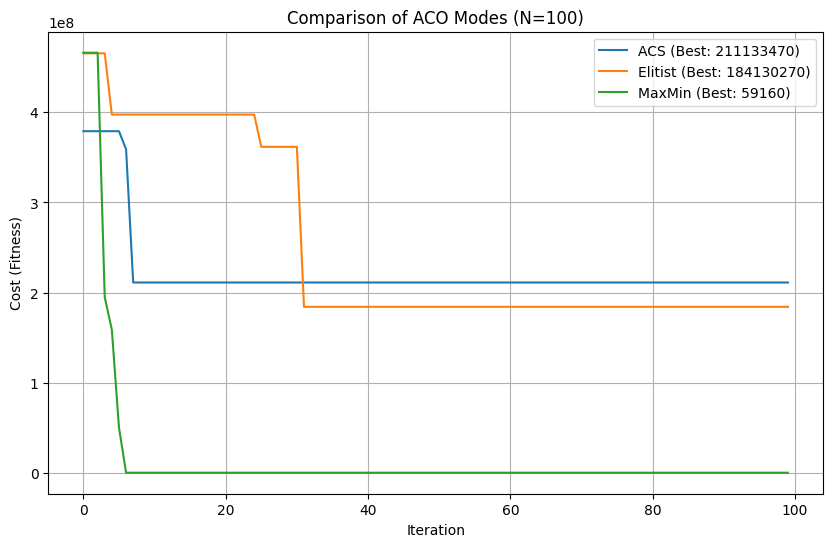

In [5]:
import matplotlib.pyplot as plt
from src.ACO.solve import SolveTSPUsingACO

common_params = {
    "problem": problem,         
    "colony_size": 20,
    "steps": 100,                # Số thế hệ (iterations)
    "alpha": 1.0,
    "beta": 3.0,
    "rho": 0.1,
    "pheromone_deposit_weight": 1.0,
    "initial_pheromone": 1.0,
    "elitist_weight": 1.0,       # Chỉ dùng cho Elitist
    "min_scaling_factor": 0.001  # Chỉ dùng cho MaxMin
}


modes = ['ACS', 'Elitist', 'MaxMin']
results = {} 


plt.figure(figsize=(10, 6))

for mode in modes:
    solver = SolveTSPUsingACO(mode=mode, **common_params)
    runtime, best_cost, progress = solver.run()
    results[mode] = progress
    plt.plot(progress, label=f'{mode} (Best: {best_cost:.0f})')


plt.title(f"Comparison of ACO Modes (N={problem.num_request})")
plt.xlabel("Iteration")
plt.ylabel("Cost (Fitness)")
plt.legend() 
plt.grid(True)


plt.savefig('aco_comparison.png')
plt.show()